In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Get results data

Please select a measure for the analysis. You can choose between VUS_PR and AUC_PR. This file contains the accuracy scores for 496 time series (time series in the test set that where not used for training the model selection methods).

In [35]:
measure_name = 'VUS_PR'
df = pd.read_csv('../../results/accuracy/all_accuracy_{}.csv'.format(measure_name))
df = df.drop(labels='Unnamed: 0',axis=1)

methods_conv = [
    'inception_time_{}',
    'convnet_{}',
    'resnet_{}',]

methods_sit = [
    'sit_conv_{}',
    'sit_linear_{}',
    'sit_stem_{}',
    'sit_stem_relu_{}',]

methods_ts = ['rocket_{}']

methods_feature = [
    'ada_boost_{}',
    'knn_{}',
    'decision_tree_{}',
    'random_forest_{}',
    'mlp_{}',
    'bayes_{}',
    'qda_{}',
    'svc_linear_{}']

old_methods = ['IFOREST', 'LOF', 'MP', 'NORMA', 'IFOREST1', 'HBOS', 'OCSVM','PCA', 'AE', 'CNN', 'LSTM', 'POLY']

Base_methods = ['Avg Ens','Oracle']

all_length = [16,32,64,128,256,512,768,1024]

all_methods = old_methods + Base_methods
all_methods += [meth.format(length) for meth in methods_conv for length in all_length]
all_methods += [meth.format(length) for meth in methods_sit for length in all_length]
all_methods += [meth.format(length) for meth in methods_ts for length in all_length]
all_methods += [meth.format(length) for meth in methods_feature for length in all_length]


df

,filename,dataset,NORMA,IFOREST1,IFOREST,MP,HBOS,POLY,OCSVM,AE,...,ratio,nb_anomaly,average_anom_length,median_anom_length,std_anom_length,data_len,point_anom,seq_anom,mixed_anom,type_an
0,S01R02E0.test.csv@4.out,Daphnet,0.198065,0.055081,0.055895,0.149085,0.044397,0.053686,0.052545,0.081305,...,0.053715,5.0,309.400000,256.0,160.946699,28800.0,0.0,1.0,0.0,sequence
1,S02R01E0.test.csv@3.out,Daphnet,0.266148,0.220559,0.436835,0.171883,0.439032,0.322560,0.158916,0.129705,...,0.138164,9.0,393.000000,440.0,304.543739,25600.0,0.0,1.0,0.0,sequence
2,S03R01E1.test.csv@2.out,Daphnet,0.133152,0.443217,0.481405,0.134326,0.434777,0.486815,0.237568,0.229873,...,0.219894,23.0,342.652174,314.0,212.757385,35840.0,0.0,1.0,0.0,sequence
3,S03R01E1.test.csv@4.out,Daphnet,0.133279,0.473794,0.519852,0.133948,0.477152,0.525571,0.226820,0.151449,...,0.219894,23.0,342.652174,314.0,212.757385,35840.0,0.0,1.0,0.0,sequence
4,S03R01E1.test.csv@7.out,Daphnet,0.132663,0.426419,0.509005,0.132747,0.436821,0.560477,0.216212,0.142420,...,0.219894,23.0,342.652174,314.0,212.757385,35840.0,0.0,1.0,0.0,sequence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,Yahoo_A2synthetic_79_data.out,YAHOO,0.384001,0.642029,0.003151,0.016793,0.009280,0.346554,0.043412,0.006404,...,0.002815,2.0,2.000000,2.0,0.000000,1421.0,0.0,1.0,0.0,sequence
493,Yahoo_A2synthetic_7_data.out,YAHOO,0.005119,0.539482,0.004203,0.011321,0.004529,0.346554,0.621320,0.002769,...,0.002815,2.0,2.000000,2.0,0.000000,1421.0,0.0,1.0,0.0,sequence
494,Yahoo_A2synthetic_89_data.out,YAHOO,0.297793,0.664473,0.016116,0.070607,0.008322,0.160813,0.014421,0.053064,...,0.006334,3.0,3.000000,3.0,0.000000,1421.0,0.0,1.0,0.0,sequence
495,Yahoo_A2synthetic_91_data.out,YAHOO,0.023217,0.564564,0.563784,0.003529,0.648422,0.619917,0.503619,0.503619,...,0.002815,2.0,2.000000,2.0,0.000000,1421.0,0.0,1.0,0.0,sequence


# Overview of the experimental analysis

In this section, we compare the existing detectors with the Averaging Ensemble, the Oracle, and one of the best model selection methods from our experimental evaluation.

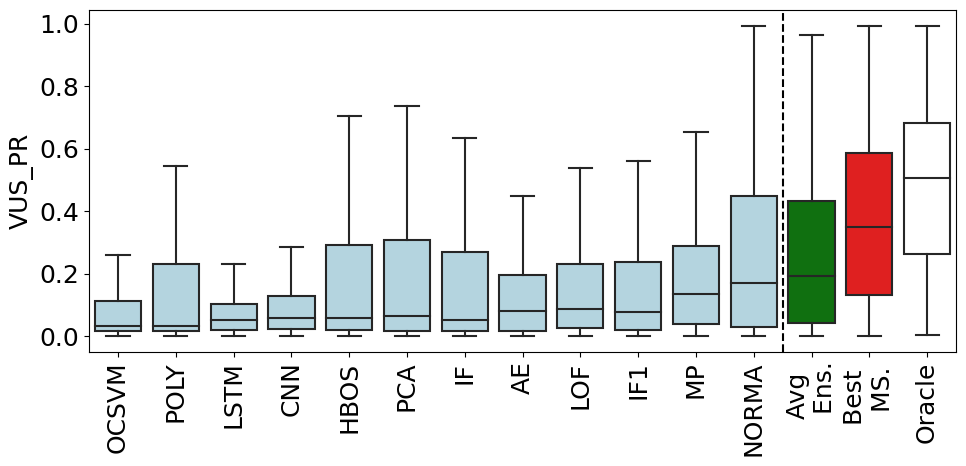

In [40]:
def plot_result_boxplot_dataset():    
    plt.rcParams.update({'font.size': 18})
    plt.figure(figsize=(10,5))
    old_method_order = ['OCSVM','POLY','LSTM','CNN','HBOS','PCA','IFOREST','AE','LOF','IFOREST1','MP','NORMA']
    my_pal = {method:"lightblue" for method in old_method_order}
    my_pal = {**my_pal, **{"Avg Ens":"green", 'resnet_1024':'red','Oracle':'white' }}
    bplot = sns.boxplot(data=df[old_method_order+['Avg Ens','resnet_1024','Oracle']],palette=my_pal,showfliers = False)
    plt.xticks(rotation=40)
    plt.xticks(list(range(15)), ['OCSVM','POLY','LSTM','CNN','HBOS','PCA','IF','AE','LOF','IF1','MP','NORMA'] + ['Avg \n Ens.', 'Best \n MS.','Oracle'],rotation=90)
    plt.ylabel(measure_name)

    plt.axvline(11.5,color='black',linestyle='--')
    plt.tight_layout()
    plt.show()
    plt.close()
    
plot_result_boxplot_dataset()

# Overall results of the experimental analysis

We first analyze the accuracy of all
model selection methods (using all window lengths) and compare
them to the Oracle (perfect classifier), the Averaging ensembling
method (i.e., running all anomaly detection methods and returns
and average all anomaly scores), and anomaly detection methods
in the TSB-UAD benchmark.

The figure below depicts the overall measure chosen at the beginning, over the entire TSB-UAD benchmark (i.e., each box-plot
corresponds to 496 accuracy values for the 496 time series into
the test set). The Convoutional-based approaches are in blue, the
Transformer-based approaches are in red, the Feature-based approaches are in green, Rocket models are in dark grey, and the
anomaly detection methods of the TSB-UAD benchmark are in
light blue. The oracle is the top box plot (in white), and the Averaging ensembling is the dark red box plot. The box-plot are sorted
based on the median value. In total, we compare 142 models on 496
time series.

First, we observe that almost all model selection methods outperform the existing anomaly detection methods regardless of the
accuracy measure used. We also see that most model selection
methods outperform the Averaging ensembling approach. Thus,
we can conclude that model selection using time series classifiers
significantly improves the state of the art for anomaly detection in
time series.

Text(0, 0.5, 'VUS_PR')

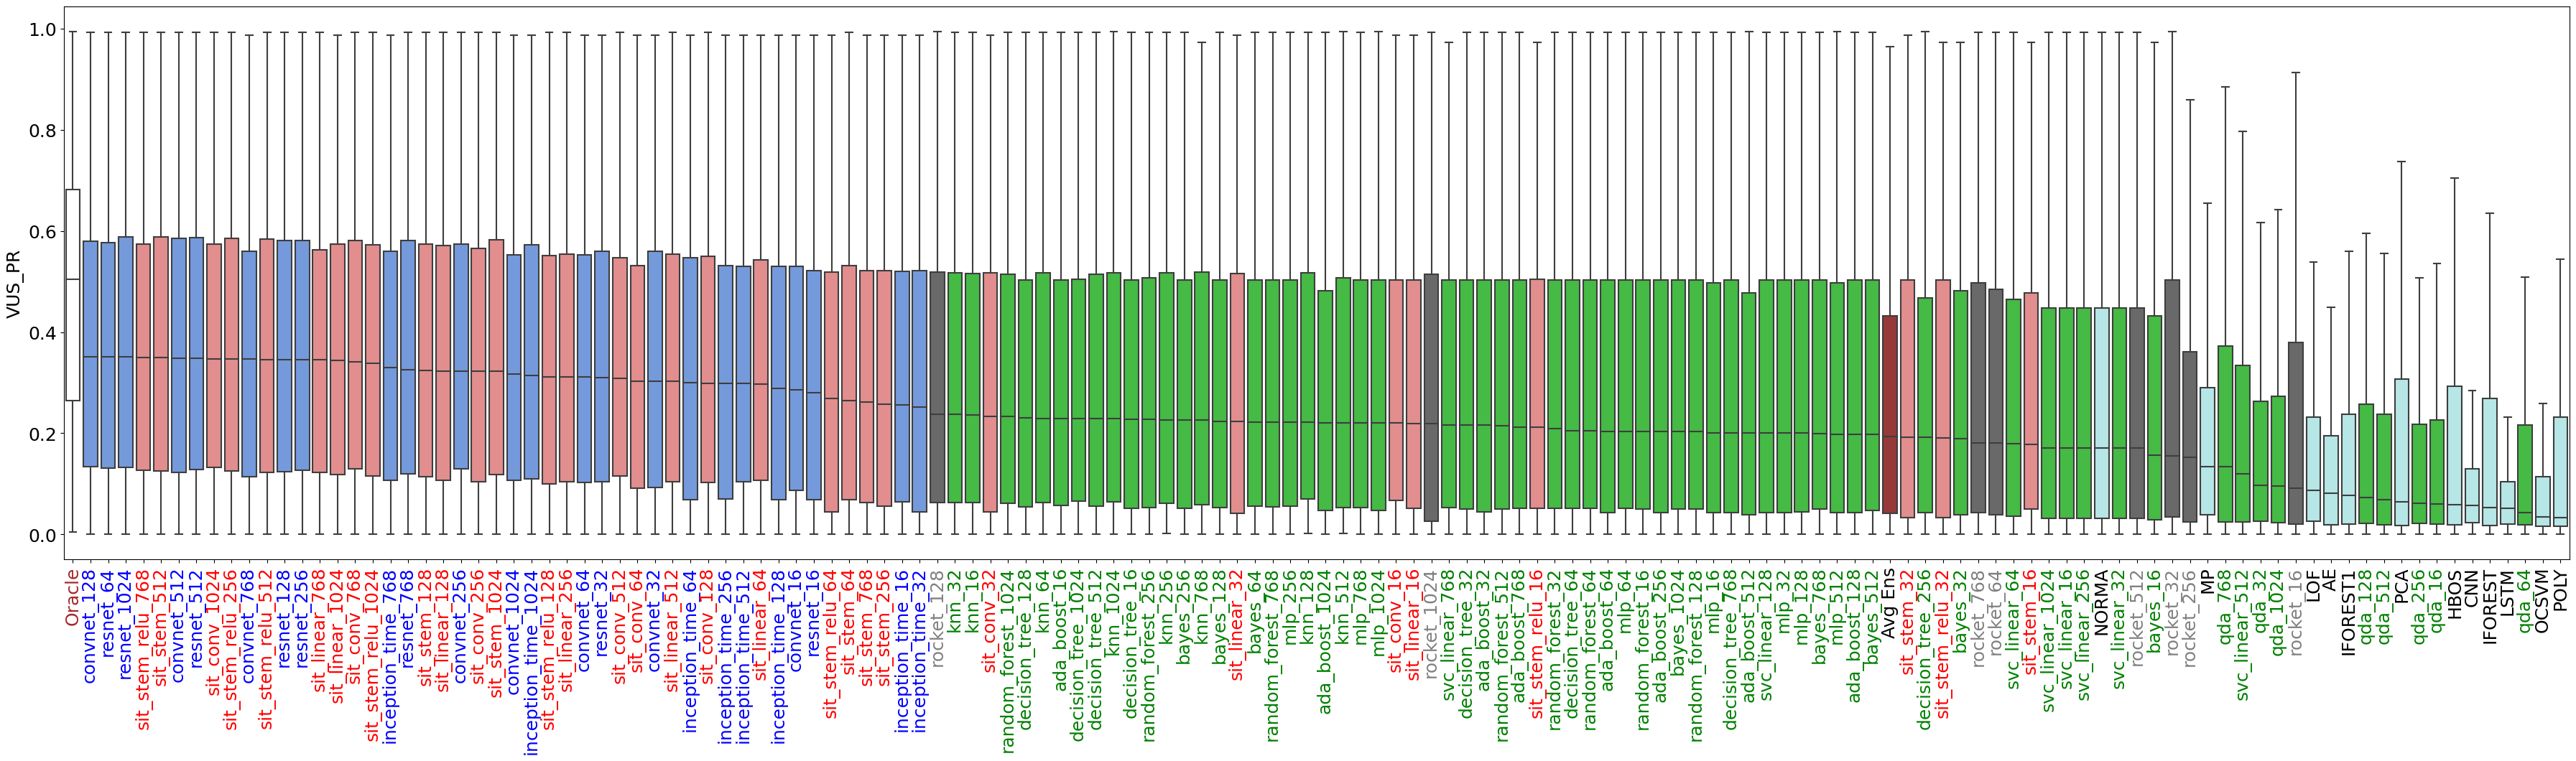

In [37]:
sns.set_palette(sns.color_palette())
plt.rcParams.update({'font.size': 18})



plt.figure(figsize=(45,10))

order = list(df[all_methods].median().sort_values().index)[::-1]
my_pal = {method:"paleturquoise" for method in old_methods}
for family,color in zip([methods_conv,methods_sit,methods_ts,methods_feature],['cornflowerblue','lightcoral','dimgray','limegreen']):
    for length in all_length:
        my_pal_tmp = {method.format(length):color for method in family}
        my_pal = {**my_pal,**my_pal_tmp}
my_pal = {**my_pal,**{"Avg Ens":"brown",'Oracle':'white' }}
g = sns.boxplot(data=df[all_methods],palette=my_pal,order=order,showfliers = False)
for tick_label in g.axes.get_xticklabels():
    if 'sit_' in tick_label.get_text():
        tick_label.set_color("red")
    elif ('convnet_' in tick_label.get_text()) or ('resnet_' in tick_label.get_text()) or ('inception_' in tick_label.get_text()):
        tick_label.set_color("blue")
    elif 'rocket_' in tick_label.get_text():
        tick_label.set_color("grey")
    elif ('Oracle' in tick_label.get_text()) or ('Avg Ens.' in tick_label.get_text()):
        tick_label.set_color("brown")
    elif '_'not  in tick_label.get_text():
        tick_label.set_color("black")
    else:
        tick_label.set_color("green")
        

plt.xticks(rotation=90)
plt.ylabel(measure_name)

# Model selected distribution

We then inspect in detail
the prediction and the detector chosen by the model selection approaches. In this section, we consider only 𝑟𝑒𝑠𝑛𝑒𝑡-1024, 𝑐𝑜𝑛𝑣𝑛𝑒𝑡-128,
𝑠𝑖𝑡-𝑠𝑡𝑒𝑚-512, 𝑟𝑜𝑐𝑘𝑒𝑡-128, and 𝑘𝑛𝑛-1024. These approaches are the best
models (using either AUC-PR or VUS-PR) based on the analysis
conducted in Section 5.2.


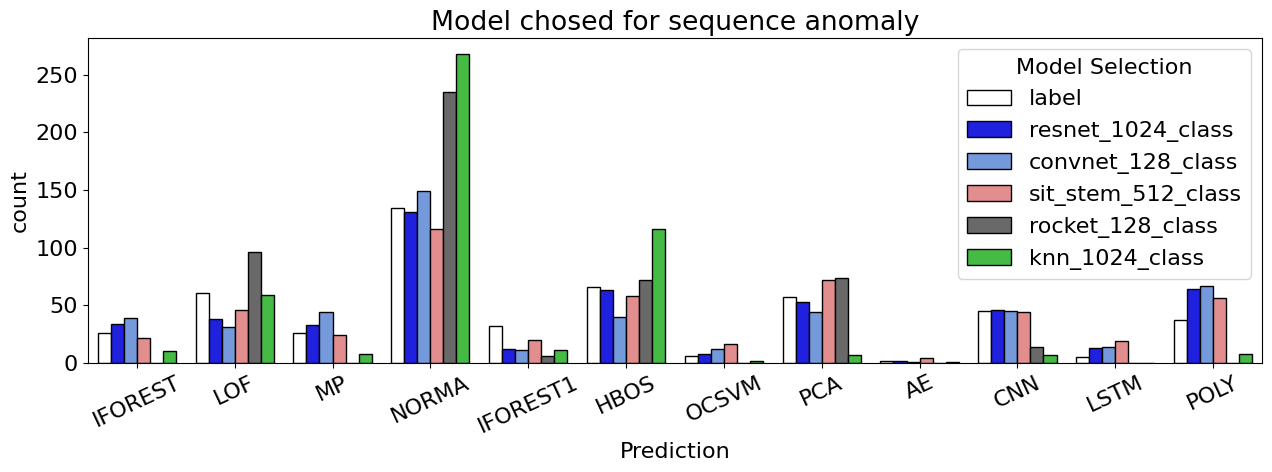

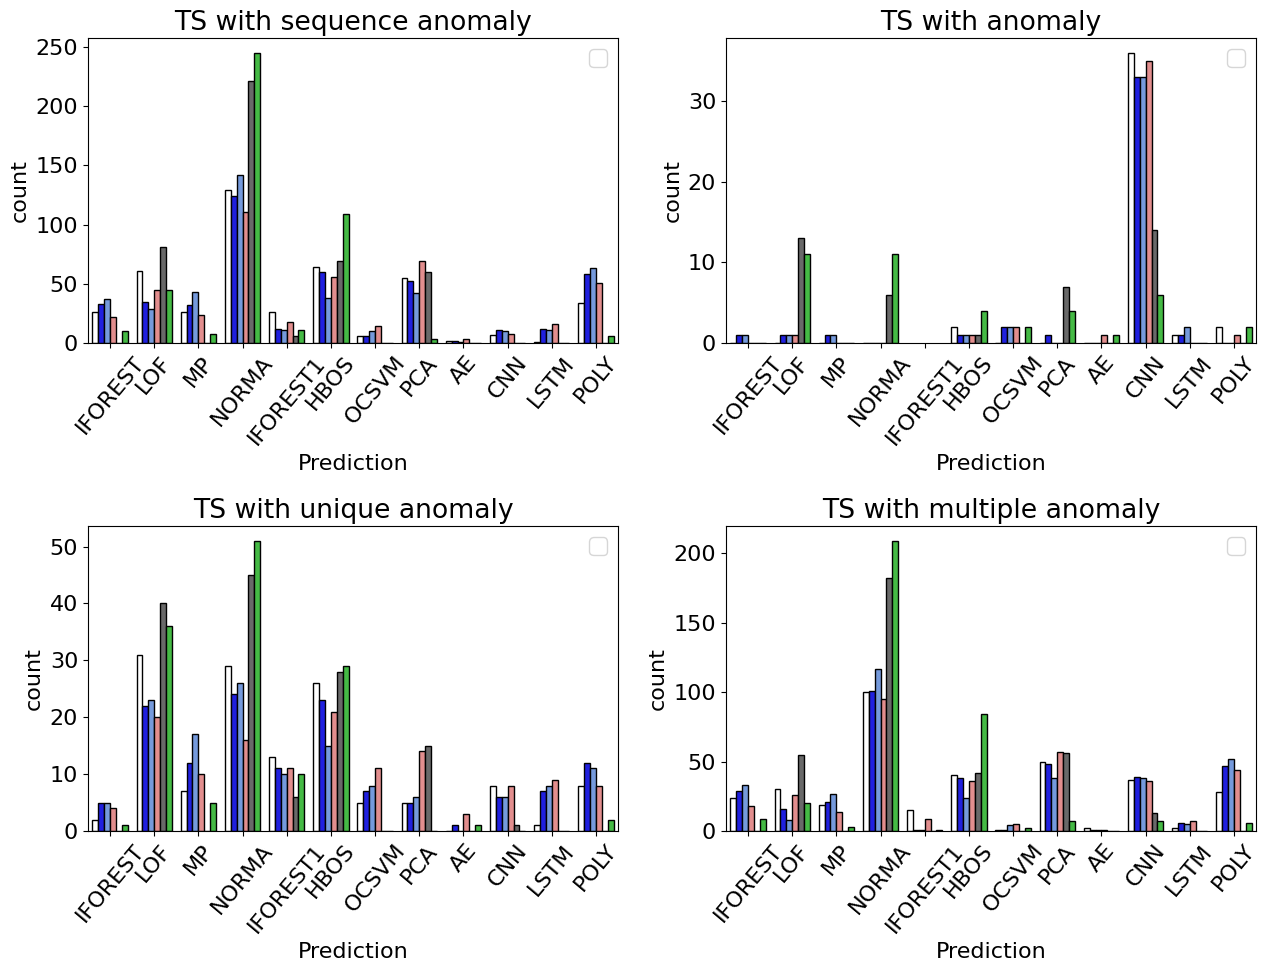

In [38]:


plt.rcParams.update({'font.size': 16})
my_palette = {'label':'white',
              'resnet_1024_class':'blue',
              'convnet_128_class': 'cornflowerblue',
              'sit_stem_512_class': 'lightcoral',
              'rocket_128_class': 'dimgray',
              'knn_1024_class': 'limegreen'}

plt.figure(figsize=(13,5))
plt.title('Model chosed for sequence anomaly')
columns = ['label','resnet_1024_class','convnet_128_class','sit_stem_512_class','rocket_128_class','knn_1024_class']
df1 = df[columns].melt(var_name='Model Selection', value_name='Prediction')
sns.countplot(x='Prediction', hue='Model Selection', data=df1,order=old_methods,palette=my_palette,edgecolor='black')
plt.xticks(rotation=25)
plt.tight_layout()

plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.title('TS with sequence anomaly')
df1 = df.loc[df['type_an']=='sequence'][columns].melt(var_name='Model Selection', value_name='Prediction')
sns.countplot(x='Prediction', hue='Model Selection', data=df1,order=old_methods,palette=my_palette,edgecolor='black')
plt.legend([])
plt.xticks(rotation=50)

plt.subplot(2,2,2)
plt.title('TS with anomaly')
df1 = df.loc[df['type_an']=='point'][columns].melt(var_name='Model Selection', value_name='Prediction')
sns.countplot(x='Prediction', hue='Model Selection', data=df1,order=old_methods,palette=my_palette,edgecolor='black')
plt.legend([])
plt.xticks(rotation=50)

plt.subplot(2,2,3)
plt.title('TS with unique anomaly')
df1 = df.loc[df['nb_anomaly']== 1][columns].melt(var_name='Model Selection', value_name='Prediction')
sns.countplot(x='Prediction', hue='Model Selection', data=df1,order=old_methods,palette=my_palette,edgecolor='black')
plt.legend([])
plt.xticks(rotation=50)

plt.subplot(2,2,4)
plt.title('TS with multiple anomaly')
df1 = df.loc[df['nb_anomaly'] > 1][columns].melt(var_name='Model Selection', value_name='Prediction')
sns.countplot(x='Prediction', hue='Model Selection', data=df1,order=old_methods,palette=my_palette,edgecolor='black')
plt.legend([])
plt.xticks(rotation=50)
plt.tight_layout()
